In [2]:
import TurbPy as tb
from TurbPy.imports import *

In [3]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
deck =  'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck
data = '/pscratch/sd/g/goodwill/' + deck + 'data/'
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

lx = np.linspace(0, info['Lx/di'], int(info['nx']))
ly = np.linspace(0, info['Ly/di'], int(info['ny']))
print(lx)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

[0.00000000e+00 9.77326036e-03 1.95465207e-02 ... 1.24804535e+01
 1.24902267e+01 1.25000000e+01]


In [4]:
print(info['ny'])

2560.0


In [5]:
# pid_cuts = np.zeros((len(times), int(info['nx'])))
# print(pid_cuts.shape)
# for t in np.arange(0,len(times)):
#   sp = 'electron'
#   pth, pid = tb.ps_calc(dirs, times[t], sp, kfilt = True)
#   # ps = pth + pid
#   pid_cuts[t, :] = pid[:,int(info['ny']/2)]
#   if t % 100 ==0:
#     print(t)

In [6]:
# fig, axs = plt.subplots(1,1, figsize=(12, 6), sharex = True, layout='constrained')
# ax1 = axs.pcolormesh(twci, lx, pid_cuts.T, cmap = 'seismic', vmin = -0.00002, vmax = 0.00002)
# bar = axs.figure.colorbar(ax1, format='%.0E')
# bar.set_label(label = f'$PiD^{sp[0]}$', size = 25)
# # axs.figure.colorbar.set_label(label = f'$PiD^{sp[0]}$')
# # axs.figure.axes[0].tick_params(axis="both", labelsize=21) 
# axs.figure.axes[1].tick_params(axis="y", labelsize=15) 
# axs.set_xlabel(r'$t \omega_{ci}$', fontsize = 20)
# axs.set_ylabel(r'$x (d_i)$', fontsize = 20)
# axs.tick_params(which='both', labelsize = 25)
# axs.set_title(f'$Y = {np.round(ly[500],2)} d_i$', fontsize = 20)
# fig.savefig(figs + f'pid{sp[0]}_cuts.jpg')

In [7]:
# np.savetxt(data + f'pid{sp[0]}_cuts.csv', pid_cuts)

sp = 'i'
pidi_cut = np.loadtxt(data + f'pid{sp[0]}_cuts.csv')

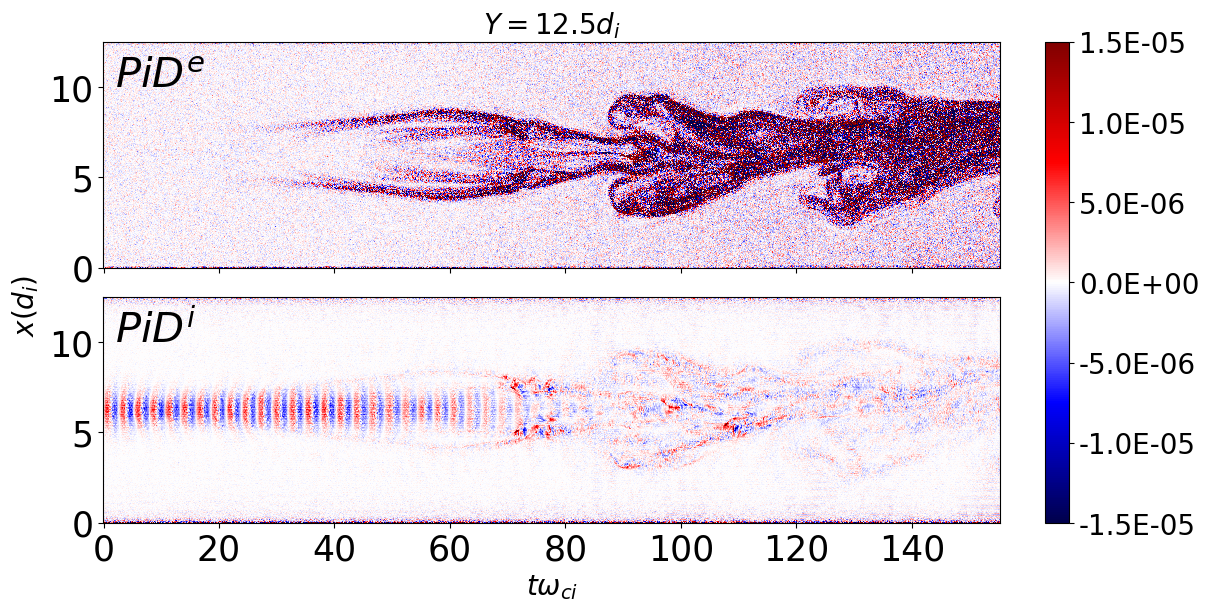

In [8]:
sp = 'e'
pide_cut = np.loadtxt(data + f'pid{sp[0]}_cuts.csv')




fig, axs = plt.subplots(2,1, figsize=(12, 6), sharex = True, layout='constrained')
ax1 = axs[0].pcolormesh(twci, lx, pide_cut.T, cmap = 'seismic', vmin = -0.000015, vmax = 0.000015)
bar = fig.colorbar(ax1, ax=axs.ravel().tolist(), format='%.1E')
bar.ax.tick_params(labelsize = 20)

# bar.set_label()
# axs.figure.colorbar.set_label(label = f'$PiD^{sp[0]}$')
# axs.figure.axes[0].tick_params(axis="both", labelsize=21) 
axs[0].figure.axes[1].tick_params(axis="y", labelsize=15) 
# axs[0].set_xlabel(r'$t \omega_{ci}$', fontsize = 20)

axs[0].tick_params(which='both', labelsize = 25)
axs[0].set_title(f'$Y = {np.round(ly[1280],2)} d_i$', fontsize = 20)


sp = 'i'
pidi_cut = np.loadtxt(data + f'pid{sp[0]}_cuts.csv')

ax1 = axs[1].pcolormesh(twci, lx, pidi_cut.T, cmap = 'seismic', vmin = -0.000015, vmax = 0.000015)
# bar = axs[1].figure.colorbar(ax1, format='%.0E')
# bar.set_label()
# axs.figure.colorbar.set_label(label = f'$PiD^{sp[0]}$')
# axs.figure.axes[0].tick_params(axis="both", labelsize=21) 
axs[1].figure.axes[1].tick_params(axis="y", labelsize=15) 
axs[1].set_xlabel(r'$t \omega_{ci}$', fontsize = 20)
# axs[1].set_ylabel(r'$x (d_i)$', fontsize = 20)
axs[1].tick_params(which='both', labelsize = 25)
axs[0].text(2, 10, r'$PiD^e$', fontsize = 30)
axs[1].text(2, 10, r'$PiD^i$', fontsize = 30)
# axs[1].set_title(f'$Y = {np.round(ly[500],2)} d_i$', fontsize = 20)

fig.supylabel(r'$x (d_i)$', fontsize = 20)
fig.savefig(figs + f'pid_cuts.pdf')